# Ensure that the MSAprocessing class that wraps tranception one produces the same output

***
## Ours

In [3]:
import logging
logging.basicConfig(level=logging.DEBUG)
logger = logging.getLogger()


In [2]:
from aide_predict.utils.msa import MSAProcessing, MSAProcessingArgs

INFO:numexpr.utils:Note: NumExpr detected 14 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [3]:
args = MSAProcessingArgs(
    theta=0.2,
    use_weights=True,
    preprocess_MSA=True,
    threshold_sequence_frac_gaps=0.5,
    threshold_focus_cols_frac_gaps=0.3,
    remove_sequences_with_indeterminate_AA_in_focus_cols=True
)

In [7]:
msa = MSAProcessing(args)
msa.process(
    '/Users/ekomp/Documents/datasets/protein_gym/msas/UBE4B_MOUSE_full_11-26-2021_b05.a2m', 
    weights_location='/Users/ekomp/Documents/repos/lab/aide_predict/notebooks/tmp/our_weights.npy',
    focus_seq_id='UBE4B_MOUSE',
    new_a2m_location='./tmp/our_msa.a2m'
)

INFO:aide_predict.utils.msa:Loaded MSA with 4743 sequences, target sequence: >UBE4B_MOUSE/1-1173
INFO:aide_predict.utils.msa:Original width of MSA: 1173
INFO:aide_predict.utils.msa:Removed gap columns in target sequence: remaining width 1173
INFO:aide_predict.utils.msa:Proportion of sequences dropped due to fraction of gaps: 0.0%
INFO:aide_predict.utils.msa:Proportion of non-focus columns removed: 23.53%
INFO:aide_predict.utils.msa:Encoding sequences
INFO:aide_predict.utils.msa:Computing sequence weights
100%|██████████| 4681/4681 [00:28<00:00, 162.30it/s]
INFO:aide_predict.utils.msa:Neff (effictive sequence count) = 674.2336460913948
INFO:aide_predict.utils.msa:Data Shape = (4681, 897, 20)


## Now theirs

Change to their environment and cd to their repo, since they do not provide importable modules.

In [4]:
import os

In [4]:
os.chdir('/Users/ekomp/Documents/repos/Tranception')

In [4]:
from  tranception.utils.msa_utils import MSA_processing

In [6]:
processing = MSA_processing(
    MSA_location='/Users/ekomp/Documents/datasets/protein_gym/msas/UBE4B_MOUSE_full_11-26-2021_b05.a2m',
    theta=0.2,
    use_weights=True,
    preprocess_MSA=True,
    threshold_sequence_frac_gaps=0.5,
    threshold_focus_cols_frac_gaps=0.3,
    remove_sequences_with_indeterminate_AA_in_focus_cols=True,
    weights_location='/Users/ekomp/Documents/repos/lab/aide_predict/notebooks/tmp/their_weights.npy',
)

In [7]:
processing.Neff

674.2336460913948

In [10]:
processing.one_hot_encoding.shape

(4681, 897, 20)

In [12]:
processing.weights.shape

(4681,)

## Check for weight equality

In [13]:
import numpy as np

In [14]:
ours = np.load('/Users/ekomp/Documents/repos/lab/aide_predict/notebooks/tmp/our_weights.npy')
theirs = np.load('/Users/ekomp/Documents/repos/lab/aide_predict/notebooks/tmp/their_weights.npy')

In [16]:
print(ours.shape)
print(theirs.shape)

(4681,)
(4681,)


In [17]:
np.isclose(ours, theirs).all()

True

Yay!! Our wrapper did not break anything

## Can we pass our preprocessed MSA and weights to tranception and skip preprocessing?

This is the function that is called in the tracneption wrapper. We will call it directly with our preprocessed MSA and weights as well as let them do it and compare the outputs.

In [2]:
import os

In [3]:
os.chdir('/Users/ekomp/Documents/repos/Tranception')

In [4]:
from  tranception.utils.msa_utils import get_msa_prior
from transformers import PreTrainedTokenizerFast

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [5]:
tokenizer = PreTrainedTokenizerFast(tokenizer_file="./tranception/utils/tokenizers/Basic_tokenizer",
                                                unk_token="[UNK]",
                                                sep_token="[SEP]",
                                                pad_token="[PAD]",
                                                cls_token="[CLS]",
                                                mask_token="[MASK]"
                                            )

In [19]:
# from original msa
their_prior = get_msa_prior(
    MSA_data_file='/Users/ekomp/Documents/datasets/protein_gym/msas/UBE4B_MOUSE_full_11-26-2021_b05.a2m',
    MSA_weight_file_name='/Users/ekomp/Documents/repos/lab/aide_predict/notebooks/tmp/their_weights.npy',
    MSA_start=0,
    MSA_end=1173,
    len_target_seq=1173,
    vocab=tokenizer.get_vocab(),
    verbose=True
)

Target seq len is 1173, MSA length is 1173, start position is 0, end position is 1173 and vocab size is 25
Num sequences in MSA pre filtering: 4743
Num sequences in MSA post filtering: 4222
Using weights in /Users/ekomp/Documents/repos/lab/aide_predict/notebooks/tmp/their_weights.npy for sequences in MSA.
Dropped 44 sequences from MSA due to absent sequence weights


In [20]:
their_prior.shape

(1173, 25)

In [21]:
their_prior

array([[8.75199031e-05, 8.75199031e-05, 8.75199031e-05, ...,
        8.75199031e-05, 8.75199031e-05, 8.75199031e-05],
       [7.78224310e-05, 7.78224310e-05, 7.78224310e-05, ...,
        7.78224310e-05, 7.78224310e-05, 7.78224310e-05],
       [6.71182114e-05, 6.71182114e-05, 6.71182114e-05, ...,
        6.71182114e-05, 6.71182114e-05, 6.71182114e-05],
       ...,
       [8.71164588e-03, 8.71164588e-03, 8.71164588e-03, ...,
        8.71164588e-03, 8.71164588e-03, 8.71164588e-03],
       [8.87832036e-03, 8.87832036e-03, 8.87832036e-03, ...,
        8.87832036e-03, 8.87832036e-03, 8.87832036e-03],
       [3.97867107e-02, 3.97867107e-02, 3.97867107e-02, ...,
        3.97867107e-02, 3.97867107e-02, 3.97867107e-02]])

In [9]:
their_prior[3,:].sum()

1.0000000000000573

<BarContainer object of 25 artists>

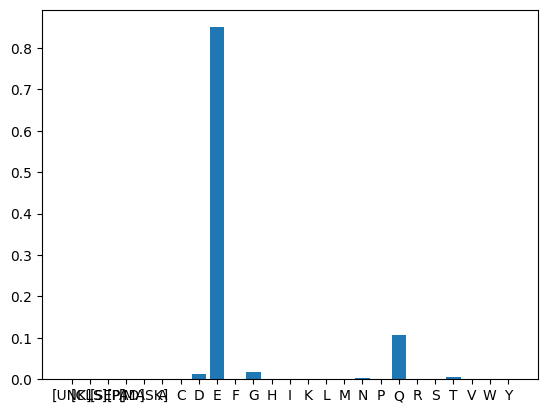

In [27]:
# show the distribution over AA of the third column
import matplotlib.pyplot as plt
plt.bar(tokenizer.convert_ids_to_tokens(range(25)), their_prior[2,:])

In [29]:
import numpy as np
np.save('/Users/ekomp/Documents/repos/lab/aide_predict/notebooks/tmp/their_prior.npy', their_prior)

## Manually update weights using our class, see if those track back to the prior

In [1]:
import logging
logging.basicConfig(level=logging.DEBUG)
logger = logging.getLogger()


In [2]:
from aide_predict.utils.msa import MSAProcessing, MSAProcessingArgs

INFO:numexpr.utils:Note: NumExpr detected 14 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [3]:
args = MSAProcessingArgs(
    theta=0.2,
    use_weights=True,
    preprocess_MSA=True,
    threshold_sequence_frac_gaps=0.5,
    threshold_focus_cols_frac_gaps=0.3,
    remove_sequences_with_indeterminate_AA_in_focus_cols=True
)

In [4]:
ids = []
seqs = []
with open('/Users/ekomp/Documents/datasets/protein_gym/msas/UBE4B_MOUSE_full_11-26-2021_b05.a2m', 'r') as f:
    lines = f.readlines()
    # get ids and sequences, may be a multiline fasta
    for line in lines:
        if line.startswith('>'):
            ids.append(line.strip())
            seqs.append('')
        else:
            seqs[-1] += line.strip()
            

In [5]:
ids[3:5]

['>UniRef100_UPI0005404ECA/1-1172', '>UniRef100_H9EN76/1-1172']

In [6]:
seqs[3:5]

['meelsadeirrrrlarlaggqtsqpttpltspqrenppgppiaasapgpsqslglnvhsmtpatspigasgvahrsqssegvsslssspsnsletqsqslsrsqsmdidgvsceksmsqvdvdsgienmevdesdrrekrslsdkepasgsevseeqalqlvckifrvswkdrdrdviflsslsaqfkqnpkevfsdfkdligqilmevlmmstqtrdenpfasltatsqpiaaaarspdrnlmlntgsnpgtsPMFCSVGSFSASSLSSLGASGGASTWDSYSDHFTIETCKETDMLNYLIECFDRIGIEEKKAPKmcsQPAVSQLLSNIRSQCISHTALVLQGSLTQPRSMQQPSFLVPYMLCRNLPYGFIQELVRTTHQDEEVFKQIFIPILQGLALAVKECSLDSDYFKYPLMALGELCETKfgkthPVCNLVASLPLWLPKSlsPGSGRELQRLSYLGAFFSFSVFAEdDAKVVEKYFSGPAITLENTRVVSQSLQHYLELGRQELFKILHSILLNGETREAALSYMAAVVNANMKKAQMQTDDRLVSTDGFMLNFLWVLQQLSTKIKLETVDPTYIFHPRCRIALPNDETRVNATMEDVNDWLTELYGdQPPFSEPKFPTECFFLTLHAHHLSILPSCRRYIRRLRAIRELNRTVEDLKNNESqwKDSPlatRHREMLKRCKTQLKKLVRCKACADAGLLDESFLRRCLNFYGLLIQLLLRILDPAYPDVTLPLNSDVPKVFAALPEFYVEDVAEFLFFIVQYSPQVLYEPCTQDIVMFLVVMLCNQNYIRNPYLVAKLVEVMFMTNPAVQPRTQKFFEMIENHPLSTKLLVPSLMKFYTDVEHTGATSEFYDKFTIRYHISTIFKSLWQNIAHHGTFMEEFNSGKQFVRYINMLINDTTFLLDESLESLKRIHEVQEEMKNkEQWDQLPRDQQQARQSQLAQDERVSRSYLALATETVDMFHILTKQVQKPFLRPELGPRLAAMLNFNLQQ

In [11]:
base_ids = [id_.split('/')[0][1:] for id_ in ids]

In [12]:
base_ids

['UBE4B_MOUSE',
 'UniRef100_A0A3Q1MHZ2',
 'UniRef100_A0A6P7EN75',
 'UniRef100_UPI0005404ECA',
 'UniRef100_H9EN76',
 'UniRef100_UPI0003C8196B',
 'UniRef100_A0A6J0X9A8',
 'UniRef100_A0A287DGC2',
 'UniRef100_A0A6P5PSI2',
 'UniRef100_UPI0012372CAE',
 'UniRef100_A0A7J8FDS4',
 'UniRef100_UPI0007623FDE',
 'UniRef100_G3SJP0',
 'UniRef100_A0A5E4D394',
 'UniRef100_UPI00193D53E5',
 'UniRef100_A0A2J8USD7',
 'UniRef100_A0A1U7UDL5',
 'UniRef100_UPI00141B6B2D',
 'UniRef100_UPI0013F392E1',
 'UniRef100_UPI00093F1F8C',
 'UniRef100_F1M8V2',
 'UniRef100_UPI00046BEB86',
 'UniRef100_UPI000C2B3515',
 'UniRef100_UPI000DC1AADA',
 'UniRef100_UPI0018B0D349',
 'UniRef100_A0A2K5YN99',
 'UniRef100_A0A2K5IVP6',
 'UniRef100_F7HC77',
 'UniRef100_UPI00051BBA59',
 'UniRef100_UPI000B3E3D49',
 'UniRef100_A0A6J3JP21',
 'UniRef100_UPI00189DC790',
 'UniRef100_UPI0018E38222',
 'UniRef100_UPI001485C85F',
 'UniRef100_UPI00129D8060',
 'UniRef100_UPI0004D0AE89',
 'UniRef100_UPI0003293034',
 'UniRef100_UPI0007A6DA66',
 'UniRef100_

In [13]:
msa = MSAProcessing(args)
msa.process(
    '/Users/ekomp/Documents/datasets/protein_gym/msas/UBE4B_MOUSE_full_11-26-2021_b05.a2m', 
    weights_location='/Users/ekomp/Documents/repos/lab/aide_predict/notebooks/tmp/our_weights_manual.npy',
    focus_seq_id='UBE4B_MOUSE',
    new_a2m_location='./tmp/our_msa_weighted.a2m',
    # ADD ADDITIONAL WEIGHTS
    # since the second colum of both seqs is 'E' we should see an increase in the weight of 'E' for that column
    # in the prior
    additional_weights=dict(zip(base_ids[3:5], [100, 100]))
)

INFO:aide_predict.utils.msa:Loaded MSA with 4743 sequences, target sequence: >UBE4B_MOUSE/1-1173
INFO:aide_predict.utils.msa:Original width of MSA: 1173
INFO:aide_predict.utils.msa:Removed gap columns in target sequence: remaining width 1173
INFO:aide_predict.utils.msa:Proportion of sequences dropped due to fraction of gaps: 0.0%
INFO:aide_predict.utils.msa:Proportion of non-focus columns removed: 23.53%
/Users/ekomp/Documents/repos/lab/aide_predict/aide_predict/utils/msa.py:166: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.seq_name_to_sequence[msa_df.index[seq_idx]] = msa_df.sequence[seq_idx]
INFO:aide_predict.utils.msa:Encoding sequences
INFO:aide_predict.utils.msa:Computing sequence weights
100%|██████████| 4681/4681 [00:28<00:00, 162.74it/s]
INFO:aide_predict.utils.msa:Neff (effictive sequen

Switch over to tranception, load the weights, and see the change

In [1]:
import os

In [2]:
os.chdir('/Users/ekomp/Documents/repos/Tranception')

In [3]:
from  tranception.utils.msa_utils import get_msa_prior
from transformers import PreTrainedTokenizerFast

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [4]:
tokenizer = PreTrainedTokenizerFast(tokenizer_file="./tranception/utils/tokenizers/Basic_tokenizer",
                                                unk_token="[UNK]",
                                                sep_token="[SEP]",
                                                pad_token="[PAD]",
                                                cls_token="[CLS]",
                                                mask_token="[MASK]"
                                            )

In [5]:
# from original msa
our_prior = get_msa_prior(
    MSA_data_file='/Users/ekomp/Documents/datasets/protein_gym/msas/UBE4B_MOUSE_full_11-26-2021_b05.a2m',
    MSA_weight_file_name='/Users/ekomp/Documents/repos/lab/aide_predict/notebooks/tmp/our_weights_manual.npy',
    MSA_start=0,
    MSA_end=1173,
    len_target_seq=1173,
    vocab=tokenizer.get_vocab(),
    verbose=True
)

Target seq len is 1173, MSA length is 1173, start position is 0, end position is 1173 and vocab size is 25
Num sequences in MSA pre filtering: 4743
Num sequences in MSA post filtering: 4222
Using weights in /Users/ekomp/Documents/repos/lab/aide_predict/notebooks/tmp/our_weights_manual.npy for sequences in MSA.
Dropped 44 sequences from MSA due to absent sequence weights


In [6]:
our_prior.shape

(1173, 25)

In [7]:
our_prior

array([[8.73411105e-05, 8.73411105e-05, 8.73411105e-05, ...,
        8.73411105e-05, 8.73411105e-05, 8.73411105e-05],
       [7.76833010e-05, 7.76833010e-05, 7.76833010e-05, ...,
        7.76833010e-05, 7.76833010e-05, 7.76833010e-05],
       [6.70171272e-05, 6.70171272e-05, 6.70171272e-05, ...,
        6.70171272e-05, 6.70171272e-05, 6.70171272e-05],
       ...,
       [7.08392713e-03, 7.08392713e-03, 7.08392713e-03, ...,
        7.08392713e-03, 7.08392713e-03, 7.08392713e-03],
       [7.19371407e-03, 7.19371407e-03, 7.19371407e-03, ...,
        7.19371407e-03, 7.19371407e-03, 7.19371407e-03],
       [3.97867667e-02, 3.97867667e-02, 3.97867667e-02, ...,
        3.97867667e-02, 3.97867667e-02, 3.97867667e-02]])

<BarContainer object of 25 artists>

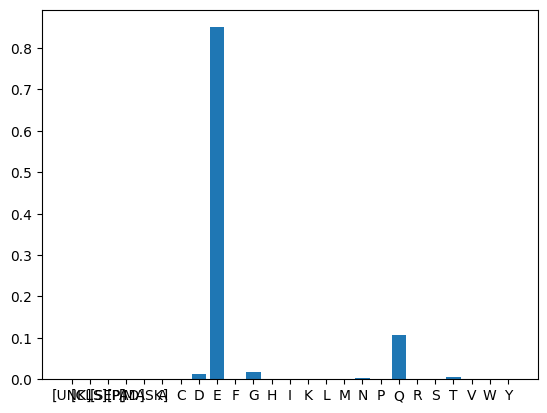

In [8]:
# show the distribution over AA of the third column
import matplotlib.pyplot as plt
plt.bar(tokenizer.convert_ids_to_tokens(range(25)), our_prior[2,:])

they look about the same. checl values

In [10]:
import numpy as np

In [11]:
their_prior = np.load('/Users/ekomp/Documents/repos/lab/aide_predict/notebooks/tmp/their_prior.npy')

In [12]:
their_prior[2,:]

array([6.71182114e-05, 6.71182114e-05, 6.71182114e-05, 6.71182114e-05,
       6.71182114e-05, 6.71182114e-05, 6.71182114e-05, 1.28942932e-02,
       8.50022550e-01, 6.71182114e-05, 1.81140094e-02, 6.71182114e-05,
       6.71182114e-05, 6.71182114e-05, 6.71182114e-05, 6.71182114e-05,
       3.91527071e-03, 6.71182114e-05, 1.07270747e-01, 9.42952551e-05,
       6.71182114e-05, 6.48070571e-03, 6.71182114e-05, 6.71182114e-05,
       6.71182114e-05])

<BarContainer object of 25 artists>

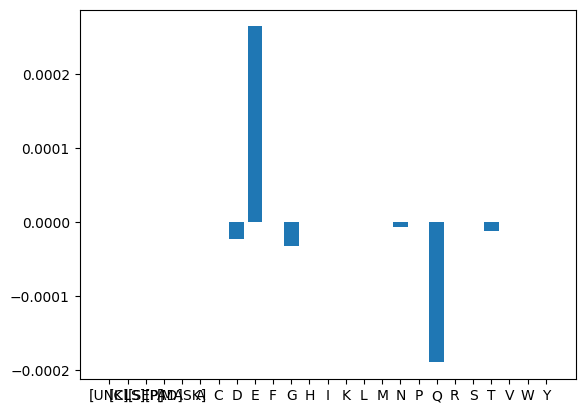

In [15]:
plt.bar(tokenizer.convert_ids_to_tokens(range(25)), our_prior[2,:] - their_prior[2,:])


In [16]:
# It worked!